In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:

l2_6000_run = pd.read_csv(
    f"l2_dummy_RTX6000Ada_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_6000_run.set_index(["M"], inplace=True)

l2_L4_run = pd.read_csv(
    f"l2_dummy_L4_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_L4_run.set_index(["M"], inplace=True)


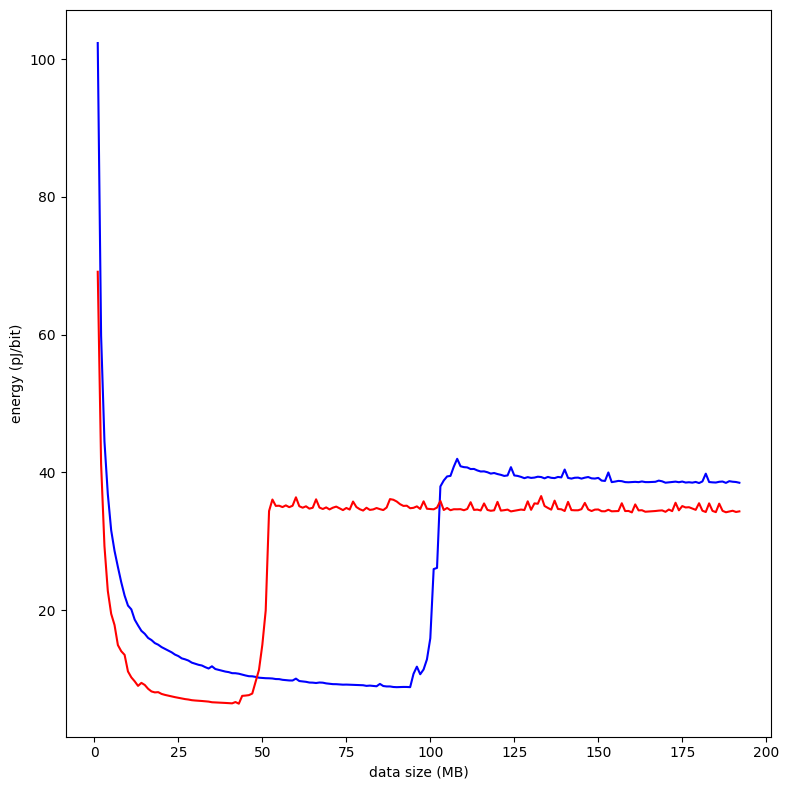

In [15]:
M_list = []
energy_6000_run_list = []
energy_6000_per_bit_list = []
energy_L4_run_list = []
energy_L4_per_bit_list = []
for M in range(1, 193):
    M_list.append(M)
    energy_6000_run_list.append(l2_6000_run.loc[M, "energy"])
    energy_6000_per_bit_list.append(l2_6000_run.loc[M, "energy"] / (M * 1024 * 1024 * 8 * 32))
    energy_L4_run_list.append(l2_L4_run.loc[M, "energy"])
    energy_L4_per_bit_list.append(l2_L4_run.loc[M, "energy"] / (M * 1024 * 1024 * 8 * 32))

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.set_xlabel("data size (MB)")
ax1.plot(M_list, energy_6000_per_bit_list, marker="", label=f"RTX4090 energy per bit", color='blue')
ax1.plot(M_list, energy_L4_per_bit_list, marker="", label=f"RTX4090 energy per bit", color='red')

ax1.set_ylabel('energy (pJ/bit)')

plt.tight_layout()
plt.show()